In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv
import locale
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

Comparing earnings trends between E-Sports and Active Sports

E-Sports Data Clean Up

In [33]:
# Open and read csv
esports_earnings = pd.read_csv("Esports Earnings Data_2013 to 2021.csv")
esports_earnings

,Player ID,ID,Name,Earnings (Year),Earnings (Overall),Unnamed: 5,Year
0,1,Finland JerAx,Jesse Vainikka,"$3,163,536.20","$6,486,948.78",48.77%,2019
1,2,France Ceb,Sébastien Debs,"$3,163,536.20","$5,824,509.40",54.31%,2019
2,3,Finland Topson,Topias Taavitsainen,"$3,163,536.20","$5,699,189.00",55.51%,2019
3,4,Denmark N0tail,Johan Sundstein,"$3,155,536.20","$7,184,163.05",43.92%,2019
4,5,Australia ana,Anathan Pham,"$3,146,536.20","$6,024,411.96",52.23%,2019
...,...,...,...,...,...,...,...
895,96,China BurNIng,"Xu, Zhilei","$40,770.84","$896,625.35",4.55%,2013
896,97,Estonia puszu,Johannes Uibos,"$40,000.00","$40,254.31",99.37%,2013
897,98,United States charley25k,- -,"$40,000.00","$40,000.00",100.00%,2013
898,99,United States Chris Tomkinson,Chris Tomkinson,"$40,000.00","$40,000.00",100.00%,2013


In [34]:
#Remove columns Earnings(Year) and Unnamed:5
columns_to_drop = ["Player ID", "Earnings (Year)", "Unnamed: 5"]

# Drop the specified columns
clean_esports_earnings = esports_earnings.drop(columns_to_drop, axis=1)

# Print the updated DataFrame
clean_esports_earnings

,ID,Name,Earnings (Overall),Year
0,Finland JerAx,Jesse Vainikka,"$6,486,948.78",2019
1,France Ceb,Sébastien Debs,"$5,824,509.40",2019
2,Finland Topson,Topias Taavitsainen,"$5,699,189.00",2019
3,Denmark N0tail,Johan Sundstein,"$7,184,163.05",2019
4,Australia ana,Anathan Pham,"$6,024,411.96",2019
...,...,...,...,...
895,China BurNIng,"Xu, Zhilei","$896,625.35",2013
896,Estonia puszu,Johannes Uibos,"$40,254.31",2013
897,United States charley25k,- -,"$40,000.00",2013
898,United States Chris Tomkinson,Chris Tomkinson,"$40,000.00",2013


In [35]:
# Convert the 'Earnings (Overall)' column to numeric
clean_esports_earnings['Earnings (Overall)'] = clean_esports_earnings['Earnings (Overall)'].str.replace('$', '').str.replace(',', '').astype(float)

# Filter the DataFrame for the years 2019, 2020, and 2021
selected_years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
filtered_data = clean_esports_earnings[clean_esports_earnings['Year'].isin(selected_years)]

# Group the data by year and select the top 10 earners for each year
top_10_esports_earners = filtered_data.groupby('Year').apply(lambda x: x.nlargest(10, 'Earnings (Overall)')).reset_index(drop=True)
top_10_esports_earners

,ID,Name,Earnings (Overall),Year
0,Germany KuroKy,Kuro Takhasomi,5288547.73,2013
1,Estonia Puppey,Clement Ivanov,4222572.80,2013
2,Sweden s4,Gustav Magnusson,2749353.74,2013
3,China Hao,"Chen, Zhihao",1761646.83,2013
4,"Korea, Republic of Faker","Lee, Sang Hyeok",1470490.14,2013
...,...,...,...,...
85,Russian Federation TORONTOTOKYO,Alexander Khertek,3995773.90,2021
86,Ukraine Mira,Miroslaw Kolpakov,3994807.25,2021
87,China Ame,"Wang, Chunyu",3912904.27,2021
88,China Faith_bian,"Zhang, Ruida",3847426.86,2021


Active Sports Data Clean Up

In [36]:
active_sports_earnings = pd.read_csv("Sports Earnings Data_2013 to 2021.csv")
active_sports_earnings

,Name,Earnings,Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball
...,...,...,...,...
1654,Patrick Ewing,4.2,1990,Basketball
1655,Greg LeMond,4.2,1990,Cycling
1656,Gerhard Berger,4.0,1990,Racing
1657,Curtis Strange,3.8,1990,Golf


In [37]:
#Rename the Earnings column
clean_active_sports_earnings = active_sports_earnings.rename(columns={"Earnings": "Earnings (Overall)"})
clean_active_sports_earnings

,Name,Earnings (Overall),Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball
...,...,...,...,...
1654,Patrick Ewing,4.2,1990,Basketball
1655,Greg LeMond,4.2,1990,Cycling
1656,Gerhard Berger,4.0,1990,Racing
1657,Curtis Strange,3.8,1990,Golf


In [38]:
# Set the locale for formatting currency
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Format "Earnings (Overall)" column as currency
clean_active_sports_earnings["Earnings (Overall)"] = clean_active_sports_earnings["Earnings (Overall)"].apply(
    lambda x: locale.currency(x * 1e6, grouping=True)
)

# Print the updated DataFrame
clean_active_sports_earnings

,Name,Earnings (Overall),Year,Sport
0,Conor McGregor,"$180,000,000.00",2021,Mixed Martial Arts
1,Lionel Messi,"$130,000,000.00",2021,Soccer
2,Cristiano Ronaldo,"$120,000,000.00",2021,Soccer
3,Dak Prescott,"$107,500,000.00",2021,Football
4,LeBron James,"$96,500,000.00",2021,Basketball
...,...,...,...,...
1654,Patrick Ewing,"$4,200,000.00",1990,Basketball
1655,Greg LeMond,"$4,200,000.00",1990,Cycling
1656,Gerhard Berger,"$4,000,000.00",1990,Racing
1657,Curtis Strange,"$3,800,000.00",1990,Golf


In [39]:
# # Convert the 'Earnings (Overall)' column to numeric
clean_active_sports_earnings['Earnings (Overall)'] = clean_active_sports_earnings['Earnings (Overall)'].str.replace('$', '').str.replace(',', '').astype(float)

# Filter the DataFrame for the years 2019, 2020, and 2021
#selected_years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
filtered_data2 = clean_active_sports_earnings[clean_active_sports_earnings['Year'].isin(selected_years)]

# Group the data by year and select the top 10 earners for each year
top_10_active_sports_earners = filtered_data2.groupby('Year').apply(lambda x: x.nlargest(10, 'Earnings (Overall)')).reset_index(drop=True)
top_10_active_sports_earners

,Name,Earnings (Overall),Year,Sport
0,Tiger Woods,78100000.0,2013,Golf
1,Roger Federer,71500000.0,2013,Tennis
2,Kobe Bryant,61900000.0,2013,Basketball
3,LeBron James,59800000.0,2013,Basketball
4,Drew Brees,51000000.0,2013,Football
...,...,...,...,...
85,Neymar,95000000.0,2021,Soccer
86,Roger Federer,90000000.0,2021,Tennis
87,Lewis Hamilton,82000000.0,2021,Racing
88,Tom Brady,76000000.0,2021,Football


Esports - Scatter Plot

The r-squared is: 0.03216059438486572
The slope is: 111490.87468333336
The pvalue is: 0.09078558455687329
The std err is: 65198.49989288271
The intercept is: -220658029.20783895


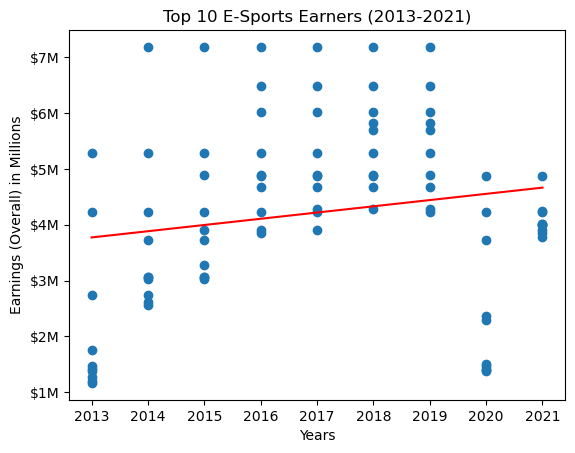

In [40]:
# Scatter Plot of Top 10 Esports Earners for the years 2015 to 2021
x_values = top_10_esports_earners['Year']
y_values = top_10_esports_earners['Earnings (Overall)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Years')
plt.ylabel('Earnings (Overall) in Millions')

# Format the y-axis labels to show values in millions
def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.title('Top 10 E-Sports Earners (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")

plt.savefig("output_data/Fig1.png")
plt.show()

Esports - Box Plot

The r-squared is: 0.03216059438486572
The slope is: 111490.87468333336
The pvalue is: 0.09078558455687329
The std err is: 65198.49989288271
The intercept is: -220658029.20783895


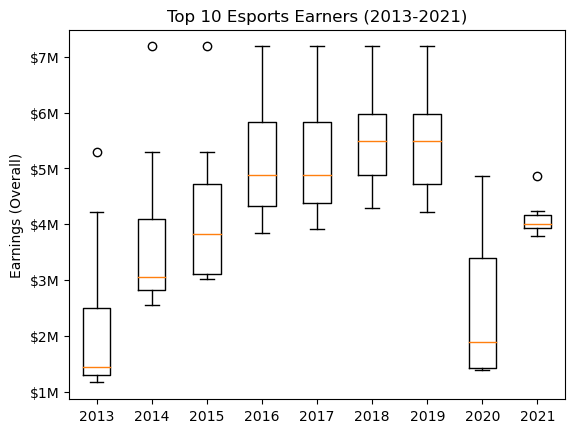

In [41]:
# Create a list of data frames, where each data frame represents the top 10 earners for a specific year
data_frames = [group[1] for group in top_10_esports_earners.groupby('Year')]

# Create a box plot using the list of data frames
plt.boxplot([df['Earnings (Overall)'] for df in data_frames])

# Set the x-axis labels to the years
plt.xticks(range(1, len(data_frames) + 1), [df['Year'].iloc[0] for df in data_frames])

# Set the y-axis label
plt.ylabel('Earnings (Overall)')

# Format the y-axis labels to show values in millions
def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the title of the box plot
plt.title('Top 10 Esports Earners (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")
plt.savefig("output_data/Fig2.png")
# Display the plot
plt.show()

Active Sports -Scatter Plot

The r-squared is: 0.09546259590137013
The slope is: 4891333.333333332
The pvalue is: 0.003046214033649277
The std err is: 1605027.8374553928
The intercept is: -9784973777.777775


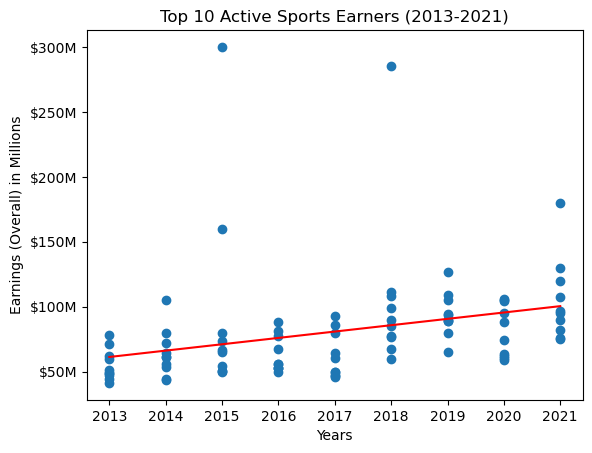

In [42]:
# Scatter Plot of Top 10 Active Sports Earners for the years 2015 to 2021
x_values = top_10_active_sports_earners['Year']
y_values = top_10_active_sports_earners['Earnings (Overall)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Years')
plt.ylabel('Earnings (Overall) in Millions')

# Format the y-axis labels to show values in millions
def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])  # Set the x-axis tick values
plt.title('Top 10 Active Sports Earners (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")
plt.savefig("output_data/Fig3.png")
plt.show()

Active Sports - Box Plot

The r-squared is: 0.09546259590137013
The slope is: 4891333.333333332
The pvalue is: 0.003046214033649277
The std err is: 1605027.8374553928
The intercept is: -9784973777.777775


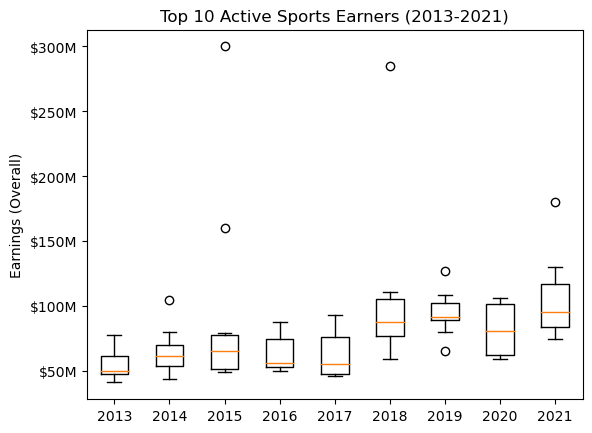

In [43]:
# Create a list of data frames, where each data frame represents the top 10 earners for a specific year
data_frames2 = [group[1] for group in top_10_active_sports_earners.groupby('Year')]

# Create a box plot using the list of data frames
plt.boxplot([df['Earnings (Overall)'] for df in data_frames2])

# Set the x-axis labels to the years
plt.xticks(range(1, len(data_frames2) + 1), [df['Year'].iloc[0] for df in data_frames2])

# Set the y-axis label
plt.ylabel('Earnings (Overall)')

# Format the y-axis labels to show values in millions
def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the title of the box plot
plt.title('Top 10 Active Sports Earners (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")
plt.savefig("output_data/Fig4.png")
# Display the plot
plt.show()

Average Top 10 Esports Earnings Per Year 

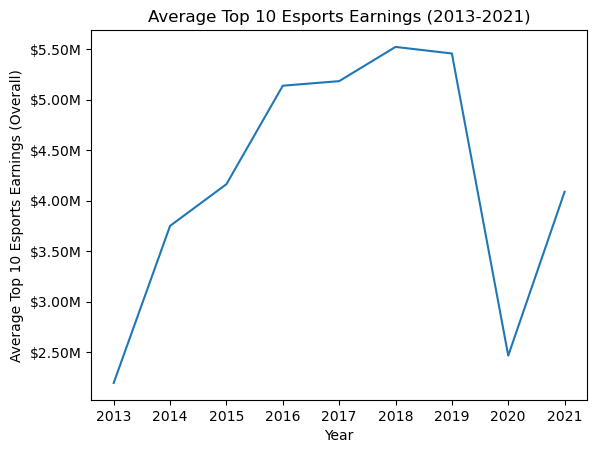

In [44]:
# Group the data by year and calculate the average earnings per year
average_top10_sports_earnings_per_year = top_10_esports_earners.groupby('Year')['Earnings (Overall)'].mean()

# Create a line plot using the average earnings per year
plt.plot(average_top10_sports_earnings_per_year.index, average_top10_sports_earnings_per_year.values)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Top 10 Esports Earnings (Overall)')

def millions_formatter(x, pos):
    return f"${x/1e6:.2f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the title of the line plot
plt.title('Average Top 10 Esports Earnings (2013-2021)')

plt.savefig("output_data/Fig5.png")

# Display the plot
plt.show()

Average Top 10 Active Sports Earnings Per Year 

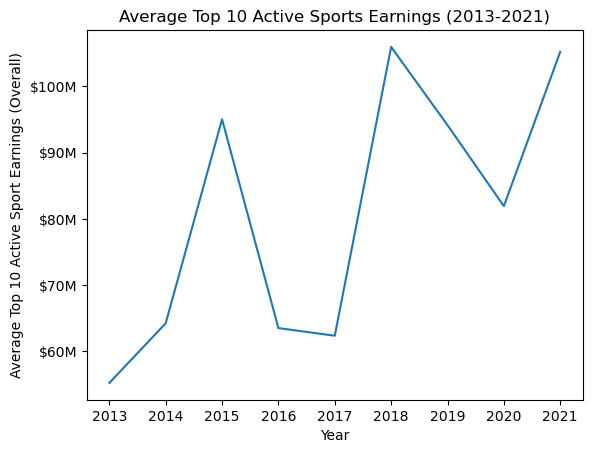

In [45]:
# Filter the data to include only years 2013 to 2021
average_top10_active_sports_earnings_per_year = top_10_active_sports_earners.groupby('Year')['Earnings (Overall)'].mean()
filtered_data4 = average_top10_active_sports_earnings_per_year.loc[2013:2021]

# Create a line plot using the filtered data
plt.plot(filtered_data4.index, filtered_data4.values)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Top 10 Active Sport Earnings (Overall)')

def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the x-axis tick values for the years 2013 to 2021
plt.xticks(range(2013, 2022))

# Set the title of the line plot
plt.title('Average Top 10 Active Sports Earnings (2013-2021)')

plt.savefig("output_data/Fig6.png")

# Display the plot
plt.show()

Average Esports Earnings Per Year

The r-squared is: 0.09546259590137013
The slope is: 4891333.333333332
The pvalue is: 0.003046214033649277
The std err is: 1605027.8374553928
The intercept is: -9784973777.777775


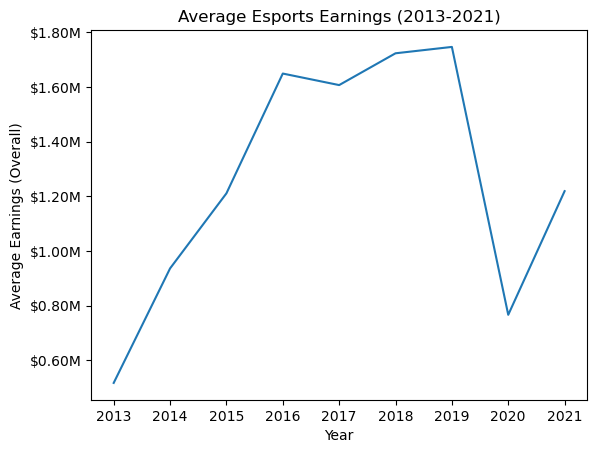

In [46]:
# Group the data by year and calculate the average earnings per year
average_esports_earnings_per_year = clean_esports_earnings.groupby('Year')['Earnings (Overall)'].mean()

# Create a line plot using the average earnings per year
plt.plot(average_esports_earnings_per_year.index, average_esports_earnings_per_year.values)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Earnings (Overall)')

def millions_formatter(x, pos):
    return f"${x/1e6:.2f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the title of the line plot
plt.title('Average Esports Earnings (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")
plt.savefig("output_data/Fig7.png")

# Display the plot
plt.show()

Average Active Sports Earnings Per Year

The r-squared is: 0.09546259590137013
The slope is: 4891333.333333332
The pvalue is: 0.003046214033649277
The std err is: 1605027.8374553928
The intercept is: -9784973777.777775


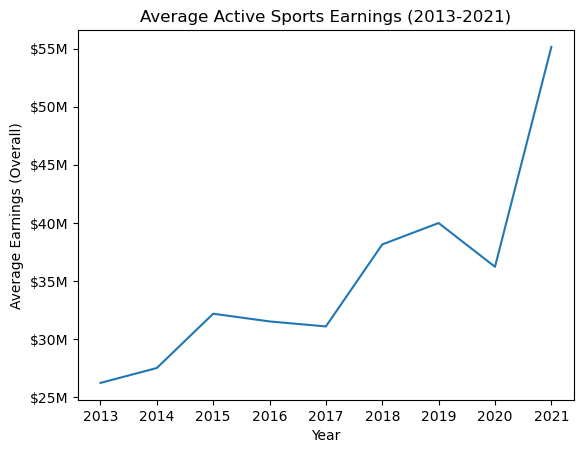

In [47]:
# Filter the data to include only years 2013 to 2021
average_active_sports_earnings_per_year = clean_active_sports_earnings.groupby('Year')['Earnings (Overall)'].mean()
filtered_data3 = average_active_sports_earnings_per_year.loc[2013:2021]

# Create a line plot using the filtered data
plt.plot(filtered_data3.index, filtered_data3.values)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Earnings (Overall)')

def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the x-axis tick values for the years 2013 to 2021
plt.xticks(range(2013, 2022))

# Set the title of the line plot
plt.title('Average Active Sports Earnings (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")
plt.savefig("output_data/Fig8.png")

# Display the plot
plt.show()

Add a stats test - t-test sample